In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

In [6]:
df= pd.read_csv('diamonds.csv')


In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.shape

(53940, 10)

# Check Null Values


In [9]:
df.isnull()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [12]:
df.corr()['price']

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

# Check catogories of categorical variables

In [13]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [14]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [15]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

# Remove less correlated variables

In [16]:
df1=df.drop(['table','depth'],axis='columns')

In [17]:
df1.head(5)

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


# Detect and remove outliers

In [18]:
df1['carat'].unique()


array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

In [19]:
df1['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [20]:
df1['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [21]:
df1['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [22]:
df1['x'].unique()

array([ 3.95,  3.89,  4.05,  4.2 ,  4.34,  3.94,  4.07,  3.87,  4.  ,
        4.25,  3.93,  3.88,  4.35,  3.79,  4.38,  4.31,  4.23,  4.21,
        4.26,  3.85,  4.39,  4.44,  3.97,  4.28,  3.96,  4.04,  4.01,
        3.92,  4.06,  3.83,  4.29,  4.13,  4.49,  3.99,  4.19,  4.24,
        4.36,  4.33,  4.02,  4.45,  3.91,  4.3 ,  4.43,  4.54,  4.78,
        4.15,  4.08,  4.03,  4.65,  4.22,  5.7 ,  6.45,  5.68,  5.81,
        5.85,  5.71,  6.27,  5.77,  5.97,  5.8 ,  6.  ,  5.94,  5.87,
        5.9 ,  6.14,  5.38,  5.96,  6.16,  5.73,  5.98,  5.72,  6.01,
        5.64,  5.57,  5.63,  5.65,  6.09,  5.56,  6.11,  6.03,  5.89,
        5.69,  5.62,  5.88,  5.52,  5.74,  5.53,  5.78,  5.83,  5.66,
        5.82,  5.79,  5.92,  5.39,  5.33,  6.83,  5.41,  5.25,  5.24,
        5.67,  5.61,  5.76,  6.05,  5.6 ,  5.19,  5.84,  6.39,  5.34,
        5.14,  5.11,  5.54,  6.07,  6.29,  6.31,  6.49,  5.28,  5.48,
        5.55,  6.41,  6.02,  5.91,  6.17,  6.61,  5.12,  6.19,  5.43,
        5.99,  5.95,

In [23]:
df1['y'].unique()

array([ 3.98,  3.84,  4.07,  4.23,  4.35,  3.96,  4.11,  3.78,  4.05,
        4.28,  3.9 ,  4.37,  3.75,  4.42,  4.34,  4.29,  4.26,  4.27,
        4.3 ,  3.92,  4.43,  4.47,  4.01,  3.94,  3.97,  3.99,  4.03,
        4.06,  4.08,  3.85,  4.31,  4.16,  4.51,  4.5 ,  4.55,  4.02,
        4.24,  4.38,  3.95,  4.48,  3.89,  3.88,  4.33,  4.32,  4.59,
        4.84,  4.22,  4.  ,  4.25,  4.13,  4.09,  4.04,  4.12,  4.67,
        5.72,  6.33,  5.67,  5.73,  5.85,  5.9 ,  5.76,  5.95,  5.78,
        5.93,  5.75,  5.96,  5.79,  5.87,  5.8 ,  5.81,  6.11,  5.43,
        6.  ,  5.84,  6.12,  5.82,  5.74,  5.94,  6.07,  5.69,  5.83,
        5.61,  5.53,  5.58,  5.59,  5.97,  6.09,  5.99,  5.86,  5.68,
        5.65,  5.55,  5.77,  5.91,  5.56,  5.89,  5.92,  6.03,  5.44,
        5.37,  5.88,  6.9 ,  5.62,  5.27,  5.26,  5.7 ,  5.64,  5.63,
        5.71,  5.51,  5.22,  6.36,  5.54,  5.66,  6.2 ,  5.18,  5.15,
        6.1 ,  6.21,  6.22,  6.45,  6.01,  5.3 ,  5.41,  5.52,  6.27,
        6.05,  6.06,

In [24]:
df1['z'].unique()

array([ 2.43,  2.31,  2.63,  2.75,  2.48,  2.47,  2.53,  2.49,  2.39,
        2.73,  2.46,  2.33,  2.71,  2.27,  2.68,  2.7 ,  2.66,  2.41,
        2.62,  2.59,  2.67,  2.4 ,  2.42,  2.44,  2.37,  2.52,  2.78,
        2.76,  2.61,  2.65,  2.79,  2.54,  2.64,  2.45,  2.72,  2.69,
        2.96,  2.58,  2.51,  2.56,  2.55,  2.87,  3.57,  3.52,  3.5 ,
        3.56,  3.72,  3.38,  3.4 ,  4.07,  3.66,  3.65,  3.58,  3.59,
        3.63,  3.69,  3.61,  3.6 ,  3.35,  3.67,  3.62,  3.87,  3.68,
        3.49,  3.47,  3.46,  3.7 ,  3.32,  3.93,  3.95,  3.64,  3.53,
        3.37,  3.43,  3.51,  3.54,  3.48,  3.55,  3.33,  3.3 ,  4.13,
        3.79,  3.24,  3.23,  4.08,  3.19,  3.94,  3.08,  3.31,  3.21,
        3.75,  3.18,  3.41,  4.03,  4.09,  3.22,  4.18,  3.76,  3.83,
        3.17,  3.44,  3.74,  3.8 ,  3.39,  3.88,  4.  ,  3.98,  3.85,
        3.96,  3.16,  3.78,  3.84,  4.33,  4.01,  3.45,  2.74,  2.95,
        2.8 ,  2.77,  2.9 ,  2.82,  3.77,  3.9 ,  3.73,  3.34,  3.86,
        3.89,  3.81,

In [25]:
df1.describe()

,carat,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3932.799722,5.731157,5.734526,3.538734
std,0.474011,3989.439738,1.121761,1.142135,0.705699
min,0.200000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,18823.000000,10.740000,58.900000,31.800000


In [26]:
Q1= df1.x.quantile(0.25)
Q3=df1.x.quantile(0.75)
IQR=Q3-Q1
IQR

1.83

In [27]:
min_threshold1= Q1-1.5*IQR
max_threshold1= Q3+1.5*IQR 
min_threshold1 ,max_threshold1

(1.9649999999999999, 9.285)

In [28]:

df1[(df1.x<min_threshold1)|(df1.x>max_threshold1)]

,carat,cut,color,clarity,price,x,y,z
11182,1.07,Ideal,F,SI2,4954,0.00,6.62,0.00
11963,1.00,Very Good,H,VS2,5139,0.00,0.00,0.00
15951,1.14,Fair,G,VS1,6381,0.00,0.00,0.00
22741,3.01,Fair,H,I1,10761,9.54,9.38,5.31
22831,3.00,Good,I,I1,10863,9.38,9.31,5.33
23644,3.65,Fair,H,I1,11668,9.53,9.48,6.38
24131,3.24,Premium,H,I1,12300,9.44,9.40,5.85
24297,3.22,Ideal,I,I1,12545,9.49,9.42,5.92
24328,3.50,Ideal,H,I1,12587,9.65,9.59,6.03
24520,1.56,Ideal,G,VS2,12800,0.00,0.00,0.00


In [29]:
df2= df1[(df1.x>min_threshold1)&(df1.x<max_threshold1)]
df2

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,2757,6.15,6.12,3.74


<AxesSubplot:ylabel='x'>

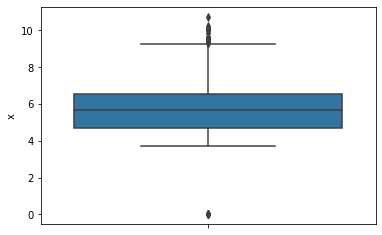

In [30]:
sns.boxplot(y='x',data=df1)

In [31]:
Q1= df2.y.quantile(0.25)
Q3=df2.y.quantile(0.75)
IQR2=Q3-Q1
IQR2

1.8200000000000003

In [32]:
min_threshold2= Q1-1.5*IQR2
max_threshold2= Q3+1.5*IQR2 
min_threshold2 ,max_threshold2

(1.9899999999999993, 9.27)

In [33]:
df2[(df2.y<min_threshold2)|(df2.y>max_threshold2)]

,carat,cut,color,clarity,price,x,y,z
24067,2.00,Premium,H,SI2,12210,8.09,58.9,8.06
49189,0.51,Ideal,E,VS1,2075,5.15,31.8,5.12


In [34]:
df3=df2[(df2.y>min_threshold2) & (df2.y<max_threshold2)]
df3

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,2757,6.15,6.12,3.74


<AxesSubplot:ylabel='y'>

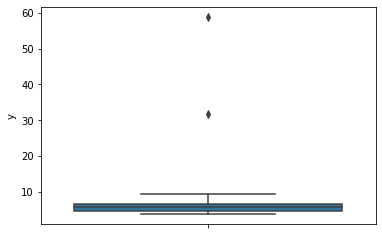

In [35]:
sns.boxplot(y='y',data=df2)

In [36]:
Q1= df3.z.quantile(0.25)
Q3=df3.z.quantile(0.75)
IQR3=Q3-Q1
IQR3

1.12

In [37]:
min_threshold3= Q1-1.5*IQR3
max_threshold3= Q3+1.5*IQR3 
min_threshold3 ,max_threshold3

(1.23, 5.710000000000001)

In [38]:
df3[(df3.z<min_threshold3)|(df3.z>max_threshold3)]

,carat,cut,color,clarity,price,x,y,z
2207,1.00,Premium,G,SI2,3142,6.55,6.48,0.00
2314,1.01,Premium,H,I1,3167,6.66,6.60,0.00
4791,1.10,Premium,G,SI2,3696,6.50,6.47,0.00
5471,1.01,Premium,F,SI2,3837,6.50,6.47,0.00
10167,1.50,Good,G,I1,4731,7.15,7.04,0.00
13601,1.15,Ideal,G,VS2,5564,6.88,6.83,0.00
14635,1.07,Ideal,F,SI1,5909,6.62,6.67,1.07
16283,3.00,Very Good,H,I1,6512,9.23,9.10,5.77
17196,2.72,Fair,J,I1,6870,8.46,8.43,5.76
19346,3.00,Fair,H,I1,8044,8.93,8.84,5.97


In [39]:
df4=df3[(df3.z>min_threshold3)&(df3.z<max_threshold3)]
df4

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,2757,6.15,6.12,3.74


<AxesSubplot:ylabel='z'>

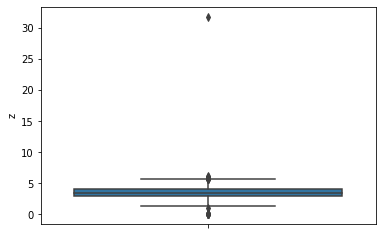

In [40]:
sns.boxplot(y='z',data=df3)

In [41]:
Q1= df4.carat.quantile(0.25)
Q3=df4.carat.quantile(0.75)
IQR4=Q3-Q1
IQR4

0.64

In [42]:
min_threshold4= Q1-1.5*IQR4
max_threshold4= Q3+1.5*IQR4 
min_threshold4 ,max_threshold4

(-0.5599999999999999, 2.0)

In [43]:
df4[(df4.carat<min_threshold4)|(df4.carat>max_threshold4)]

,carat,cut,color,clarity,price,x,y,z
12246,2.06,Premium,J,I1,5203,8.10,8.07,4.95
13002,2.14,Fair,J,I1,5405,7.74,7.70,5.36
13118,2.15,Fair,J,I1,5430,8.01,7.95,5.23
13757,2.22,Fair,J,I1,5607,8.04,8.02,5.36
13991,2.01,Fair,I,I1,5696,7.71,7.64,5.17
...,...,...,...,...,...,...,...,...
27741,2.15,Ideal,G,SI2,18791,8.29,8.35,5.21
27742,2.04,Premium,H,SI1,18795,8.37,8.28,4.84
27744,2.29,Premium,I,SI1,18797,8.52,8.45,5.24
27746,2.07,Ideal,G,SI2,18804,8.20,8.13,5.11


In [44]:
df5=df4[(df4.carat>min_threshold4)&(df4.carat<max_threshold4)]
df5

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,2757,6.15,6.12,3.74


<AxesSubplot:ylabel='carat'>

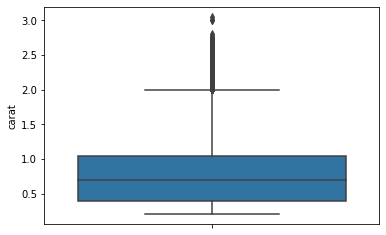

In [45]:
sns.boxplot(y='carat',data=df4)

# One Hot Encoding


In [46]:
df6 = pd.get_dummies(df5)
df6

,carat,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,326,3.95,3.98,2.43,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,326,3.89,3.84,2.31,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,327,4.05,4.07,2.31,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,334,4.20,4.23,2.63,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,335,4.34,4.35,2.75,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2757,5.75,5.76,3.50,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,2757,5.69,5.75,3.61,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,2757,5.66,5.68,3.56,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,2757,6.15,6.12,3.74,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [47]:
X = df6.drop('price', axis=1)
y = df6['price']

# Divide dataset

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [49]:
X_train.shape, X_test.shape

((38826, 24), (12943, 24))

# Model Training

In [50]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9152780046166339

In [61]:
from sklearn.tree import DecisionTreeRegressor
dtr_clf=DecisionTreeRegressor()
dtr_clf.fit(X_train,y_train)
dtr_clf.score(X_test,y_test)

0.9673019221647947

In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.90691257, 0.91033338, 0.91357995, 0.91592531, 0.907602  ])

In [52]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor

In [53]:
def find_best_model_using_gridsearchcv(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'fit_intercept':[True,False]
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['friedman_mse'],
                'splitter':['best','random']
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        }
        #'random_forest':{
           # 'model':RandomForestRegressor(),
            #'params' :{
                #'n_estimators': [10,50],
                #'criterion': ['squared_error','absolute_error']
           # }
        #}
    }

    scores=[]
    cv=ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs= GridSearchCV(config['model'],config['params'] ,cv=cv , return_train_score= False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model','best_score','best_params' ])
find_best_model_using_gridsearchcv(X,y)

C:\Users\Madhavi Perera 97\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.354e+09, tolerance: 4.610e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Madhavi Perera 97\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.828e+09, tolerance: 4.594e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Madhavi Perera 97\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

,model,best_score,best_params
0,linear_regression,0.910871,{'fit_intercept': True}
1,decision_tree,0.967704,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,lasso,0.910726,"{'alpha': 1, 'selection': 'cyclic'}"


In [65]:
from sklearn.model_selection import GridSearchCV

parameters = {#'n_estimators':[10, 50, 100],
              'criterion':['friedman_mse'],
              'splitter':['random']}

grid_obj = GridSearchCV(estimator=dtr_clf , param_grid=parameters)

grid_fit = grid_obj.fit(X_train, y_train)

best_model = grid_fit.best_estimator_

best_model.score(X_test, y_test)

0.9675381909740505

In [55]:
X_test.columns

Index(['carat', 'x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [68]:
import pickle
with open('diamond_price_predictor.pickle', 'wb') as file:
    pickle.dump(best_model, file)

In [69]:
df6.loc[0]

carat              0.23
price            326.00
x                  3.95
y                  3.98
z                  2.43
cut_Fair           0.00
cut_Good           0.00
cut_Ideal          1.00
cut_Premium        0.00
cut_Very Good      0.00
color_D            0.00
color_E            1.00
color_F            0.00
color_G            0.00
color_H            0.00
color_I            0.00
color_J            0.00
clarity_I1         0.00
clarity_IF         0.00
clarity_SI1        0.00
clarity_SI2        1.00
clarity_VS1        0.00
clarity_VS2        0.00
clarity_VVS1       0.00
clarity_VVS2       0.00
Name: 0, dtype: float64